<a href="https://colab.research.google.com/github/baraa-hakawati/Car-Insurance-Claim-Analysis/blob/main/Belt_Exam_Intermediate_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Intermediate Machine Learining: Third Cohort Exam.**
Baraa A. Hakawati

 ## **Data Loading and Inspection.**

### **Import Required Packages**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### **General Overview**

In [ ]:
# Read the dataset
path = '/content/drive/MyDrive/AXSOSACADEMY/03-DataEnrichment/loan_cluster_df.csv'
df = pd.read_csv(path)
# General info about the dataset
df.info()
# Display first 5 rows
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19438 entries, 0 to 19437
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Income             19438 non-null  int64
 1   Age                19438 non-null  int64
 2   Experience         19438 non-null  int64
 3   Married            19438 non-null  int64
 4   Owns_House         19438 non-null  int64
 5   Owns_Car           19438 non-null  int64
 6   CURRENT_JOB_YRS    19438 non-null  int64
 7   CURRENT_HOUSE_YRS  19438 non-null  int64
 8   Risk_Flag          19438 non-null  int64
dtypes: int64(9)
memory usage: 1.3 MB


,Income,Age,Experience,Married,Owns_House,Owns_Car,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,3635824,56,8,0,0,0,8,13,1
1,3231341,47,6,1,0,0,6,14,0
2,7430695,59,8,0,0,0,8,10,0
3,8688710,47,1,0,0,0,1,10,0
4,2229190,21,11,0,0,0,9,11,0


In [ ]:
# Display the number of rows and columns within the dataset
print(f"The number of records within the dataset (rows) is : {df.shape[0]}")
print(f"The mumber of features within the dataset (columns) is: {df.shape[1]}")

The number of records within the dataset (rows) is : 19438
The mumber of features within the dataset (columns) is: 9


### **Missing Values**

In [ ]:
# Identify missing values
print("\nMissing values in each feature are:")
df.isnull().sum()


Missing values in each feature are:


,0
Income,0
Age,0
Experience,0
Married,0
Owns_House,0
Owns_Car,0
CURRENT_JOB_YRS,0
CURRENT_HOUSE_YRS,0
Risk_Flag,0


### **Data duplication**

In [ ]:
# Check whether duplicates are included within the data
print(f"\nThere are {df.duplicated().sum()} duplicated records within the data")


There are 10463 duplicated records within the data


In [ ]:
# Removing duplicated records.
df = df.drop_duplicates()
print(f"\nThere are {df.duplicated().sum()} duplicated records within the data")


There are 0 duplicated records within the data


### **Unusual Data Points Identification**

In [ ]:
df.describe() # Display the overall stats for each feature to determine unusual data points.

,Income,Age,Experience,Married,Owns_House,Owns_Car,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,8.975000e+03,8975.000000,8975.000000,8975.000000,8975.000000,8975.000000,8975.000000,8975.000000,8975.000000
mean,5.014217e+06,50.015822,10.037214,0.102173,0.053816,0.301616,6.328022,12.004568,0.166462
std,2.883422e+06,16.973700,6.002911,0.302892,0.225667,0.458985,3.639975,1.406265,0.372516
min,1.031000e+04,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000
25%,2.521816e+06,35.000000,5.000000,0.000000,0.000000,0.000000,3.000000,11.000000,0.000000
50%,5.003243e+06,50.000000,10.000000,0.000000,0.000000,0.000000,6.000000,12.000000,0.000000
75%,7.497723e+06,65.000000,15.000000,0.000000,0.000000,1.000000,9.000000,13.000000,0.000000
max,9.999180e+06,79.000000,20.000000,1.000000,1.000000,1.000000,14.000000,14.000000,1.000000


## **Data Modeling**

In [ ]:
# First, we have to drop the target column for clustering.......
X = df.drop(columns=['Risk_Flag'])

In [ ]:
# Now, let's standardize the features.........
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# As required, let's determine the optimal clusters using Elbow and Silhouette methods..................
inertia = []
silhouette_scores = []
K_range = range(2, 11)

In [ ]:
# Let's looping together :) ..............
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

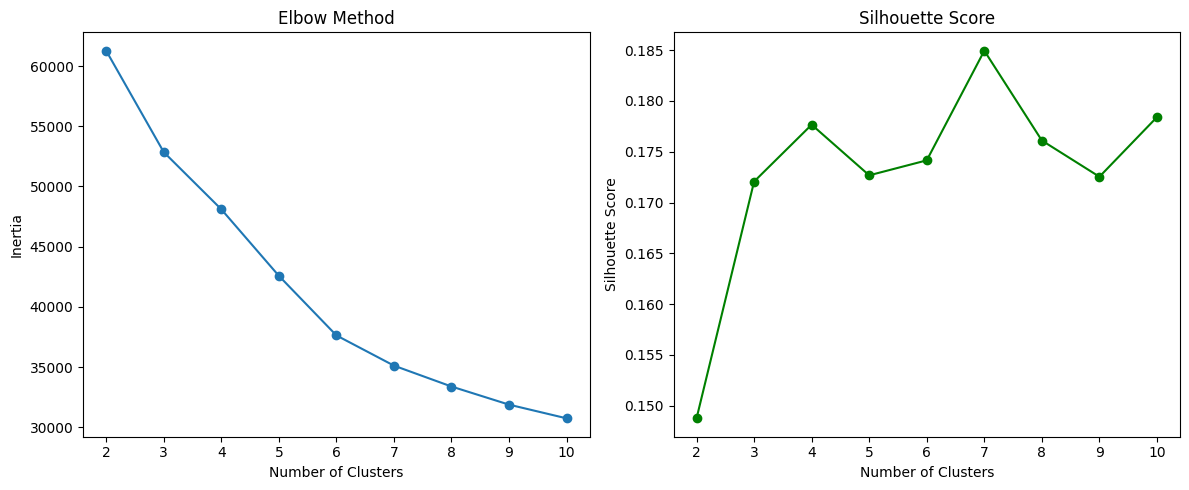

In [ ]:
# Let's plotting Elbow and Silhouette dude...........
plt.figure(figsize=(12, 5)) # Our cancas :)
# Elbow Method'
plt.subplot(1, 2, 1)
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
# Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
# Display.............
plt.tight_layout()
plt.show()

In [ ]:
# We Choose our optimal number of clusters k=3 according to Elbow method :)...........
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

In [ ]:
# Let's analyze the clusters mate :)......
cluster_summary = df.groupby('Cluster').mean().round(2)
cluster_summary

,Income,Age,Experience,Married,Owns_House,Owns_Car,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Cluster,,,,,,,,,
0,5082334.23,51.23,10.46,0.08,1.0,0.29,6.56,12.11,0.17
1,5015496.53,49.76,14.49,0.10,0.0,0.30,8.60,12.01,0.16
2,5003985.38,50.18,4.49,0.10,0.0,0.30,3.50,11.99,0.17


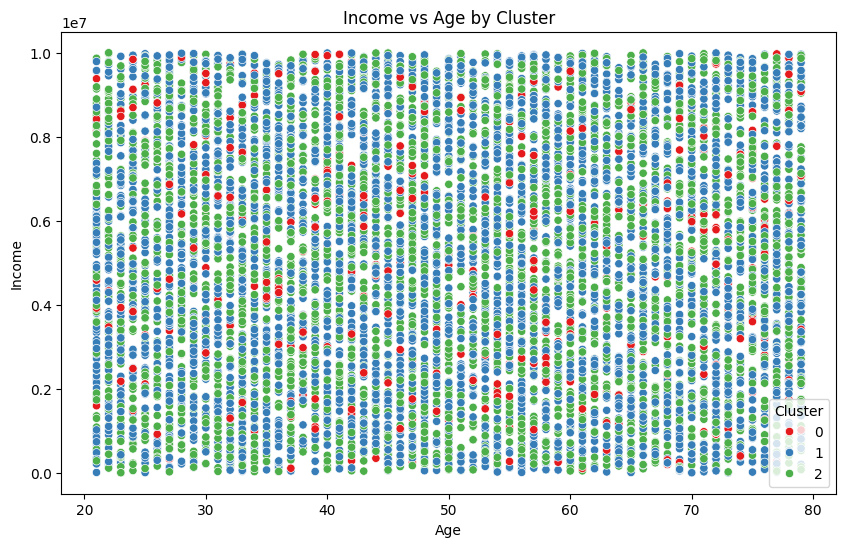

In [ ]:
# Visualization 1: Income vs Age by Cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Income', hue='Cluster', palette='Set1')
plt.title('Income vs Age by Cluster')
plt.show()

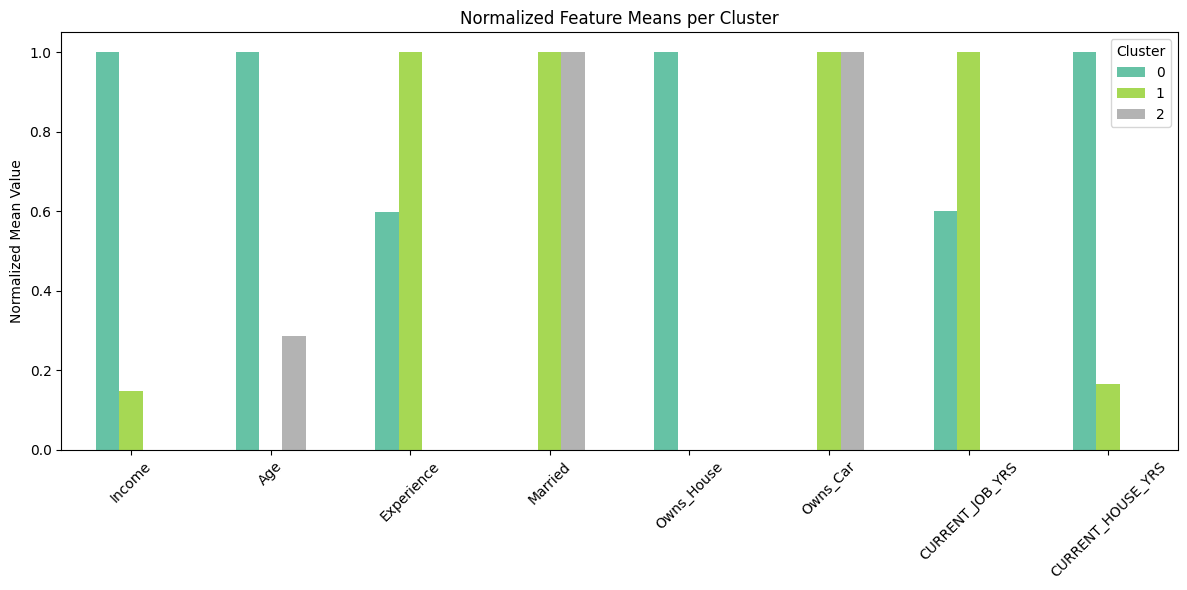

In [ ]:
# Visualization 2: Normalized feature means per cluster
normalized_means = cluster_summary.drop(columns='Risk_Flag').apply(lambda x: (x - x.min()) / (x.max() - x.min()))
normalized_means.T.plot(kind='bar', figsize=(12, 6), colormap='Set2')
plt.title('Normalized Feature Means per Cluster')
plt.ylabel('Normalized Mean Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()